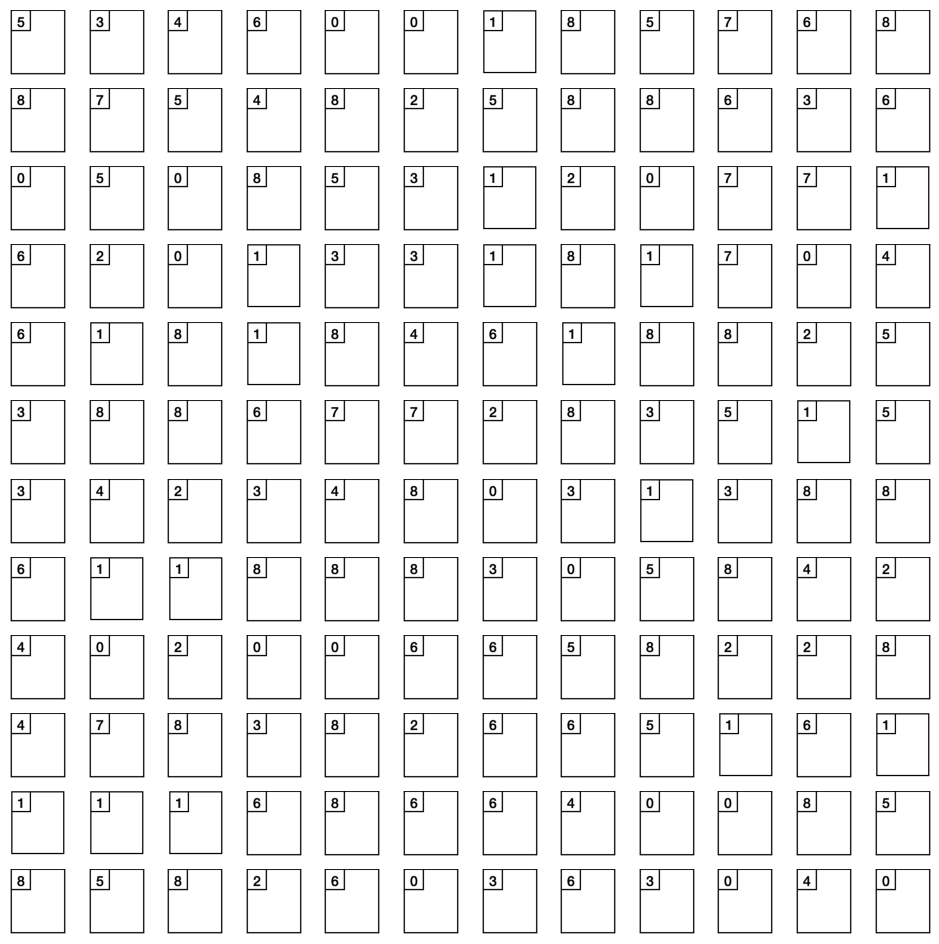

In [1]:
# Load 144 random images with replacement from the set 'box0.jpg', 'box1.jpg', ..., 'box9.jpg'.
# Then, display the images in a 12x12 grid, and save the grid as 'montage.png'.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Load 144 random images with replacement from the set 'box0.jpg', 'box1.jpg', ..., 'box9.jpg' in the folder
# 'handDigits' and store them in a list.
images = []
for i in range(144):
    images.append(mpimg.imread('Module3-Statistics/handDigits/box' + str(random.randint(0, 9)) + '.jpg'))

# Create a 12x12 grid of subplots.
fig, axs = plt.subplots(12, 12, figsize=(12, 12))

# Display the images in the grid.
for i in range(12):
    for j in range(12):
        axs[i, j].imshow(images[i * 12 + j])
        axs[i, j].axis('off')

# Save the grid
plt.savefig('Module3-Statistics/handDigits/handDigitSheet.png')
plt.show()


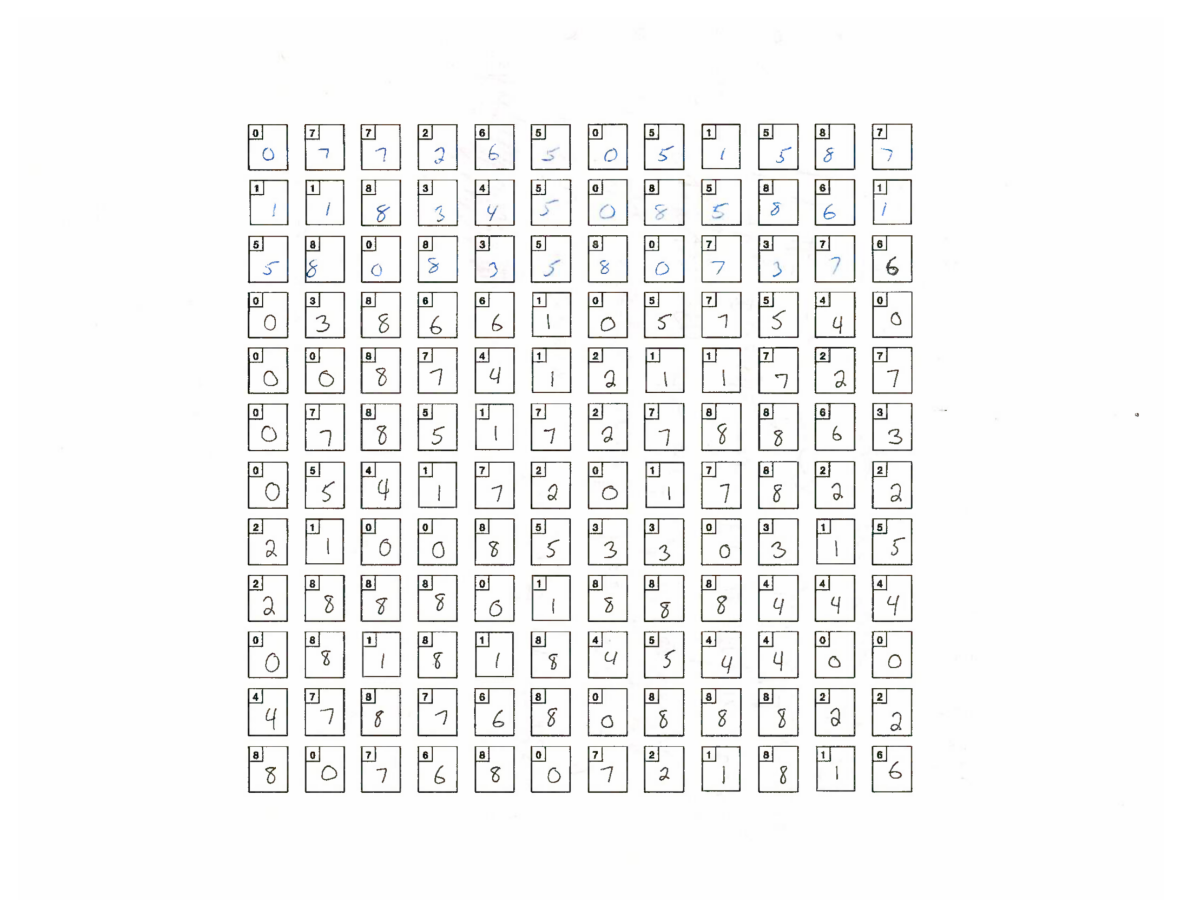

In [2]:
# Load image 'handDigits/scannedSheet.pdf,' with a single page,
# then convert it to a 2D NumPy array with high resolution
# and then display the image.
import fitz
doc = fitz.open('Module3-Statistics/handDigits/scannedSheetMultiPage.pdf')
nPages = doc.page_count
imgSet = []
for iPage in range(nPages):
    page = doc.load_page(iPage)
    pix = page.get_pixmap(matrix=fitz.Matrix(3, 3))
    img = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width, pix.n)
    # rotate the image 90 degrees to the right
    img = np.rot90(img, 3)
    imgSet.append(img)
    
plt.figure(figsize=(15, 15))
plt.imshow(imgSet[0])
plt.axis('off')
plt.show()


In [3]:
# Record the labels for the first page.
labels = [0,7,7,2,6,5,0,5,1,5,8,7, 
          1,1,8,3,4,5,0,8,5,8,6,1,
          5,8,0,8,3,5,8,0,7,3,7,6,
          0,3,8,6,6,1,0,5,7,5,4,0,
          0,0,8,7,4,1,2,1,1,7,2,7,
          0,7,8,5,1,7,2,7,8,8,6,3,
          0,5,4,1,7,2,0,1,7,8,2,2,
          2,1,0,0,8,5,3,3,0,3,1,5,
          2,8,8,8,0,1,8,8,8,4,4,4,
          0,8,1,8,1,8,4,5,4,4,0,0,
          4,7,8,7,6,8,0,8,8,8,2,2,
          8,0,7,6,8,0,7,2,1,8,1,6]

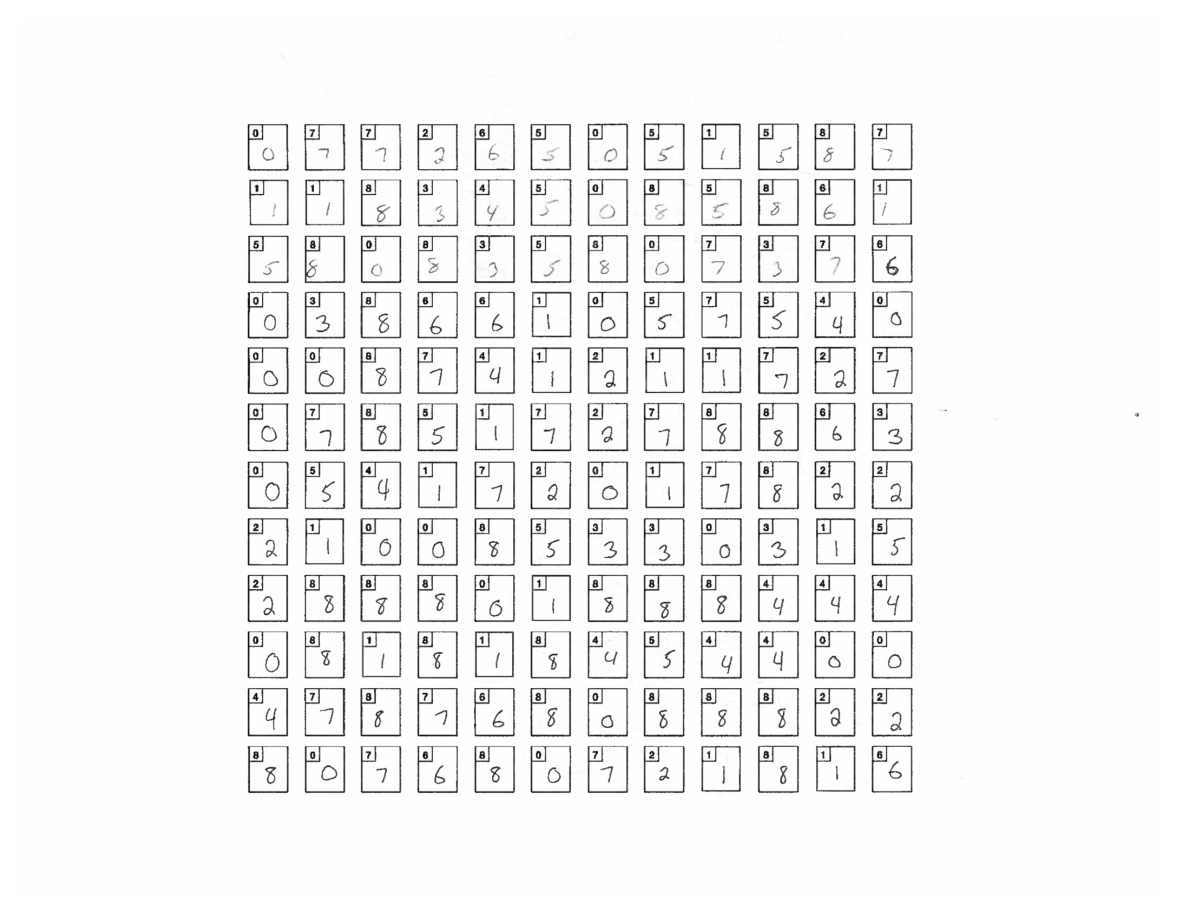

In [4]:
# Convert the image to a grayscale image and display it.
gray_img = np.mean(imgSet[0], axis=2)
plt.figure(figsize=(15, 15))
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

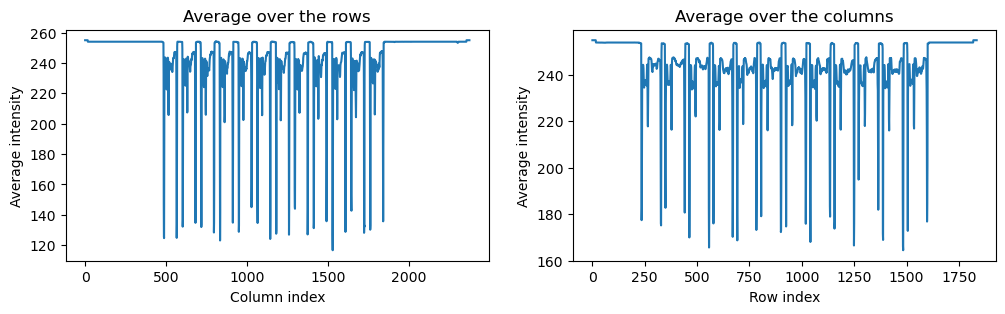

In [5]:
# Average the grayscale image over the rows and display the resulting 1D NumPy array.
gray_img = np.mean(imgSet[0], axis=2)
average_Row = np.mean(gray_img, axis=0)
average_Column = np.mean(gray_img, axis=1)

# Create two subplots, one for the average over the rows and one for the average over the columns.
fig, axs = plt.subplots(1, 2, figsize=(12,3))
axs[0].plot(average_Row)
axs[0].set_title('Average over the rows')
axs[0].set_xlabel('Column index')
axs[0].set_ylabel('Average intensity')
axs[1].plot(average_Column)
axs[1].set_title('Average over the columns')
axs[1].set_xlabel('Row index')
axs[1].set_ylabel('Average intensity')
plt.show()



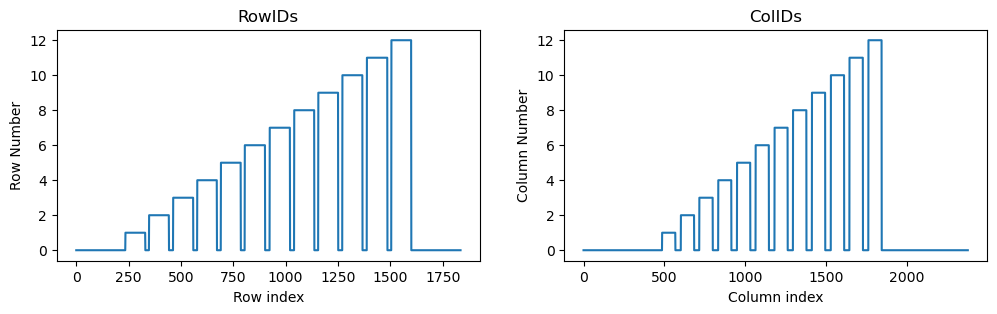

In [6]:
colIDs = np.zeros_like(average_Row)
rowNumber = 0
for i in range(1, len(average_Row)-1):
    if average_Row[i] > 250:
        colIDs[i] = 0
    elif average_Row[i-1] > 250:
        rowNumber += 1
        colIDs[i] = 0
    elif average_Row[i+1] > 250:
        colIDs[i] = 0
    else:
        colIDs[i] = rowNumber

rowIDs = np.zeros_like(average_Column)
colNumber = 0
for i in range(1, len(average_Column)-1):
    if average_Column[i] > 250:
        rowIDs[i] = 0
    elif average_Column[i-1] > 250:
        colNumber += 1
        rowIDs[i] = 0
    elif average_Column[i+1] > 250:
        rowIDs[i] = 0    
    else:
        rowIDs[i] = colNumber

# Create two subplots, one for the RowIDs and one for the ColIDs.
fig, axs = plt.subplots(1, 2, figsize=(12,3))
axs[0].plot(rowIDs)
axs[0].set_title('RowIDs')
axs[0].set_xlabel('Row index')
axs[0].set_ylabel('Row Number')
axs[1].plot(colIDs)
axs[1].set_title('ColIDs')
axs[1].set_xlabel('Column index')
axs[1].set_ylabel('Column Number')
plt.show()

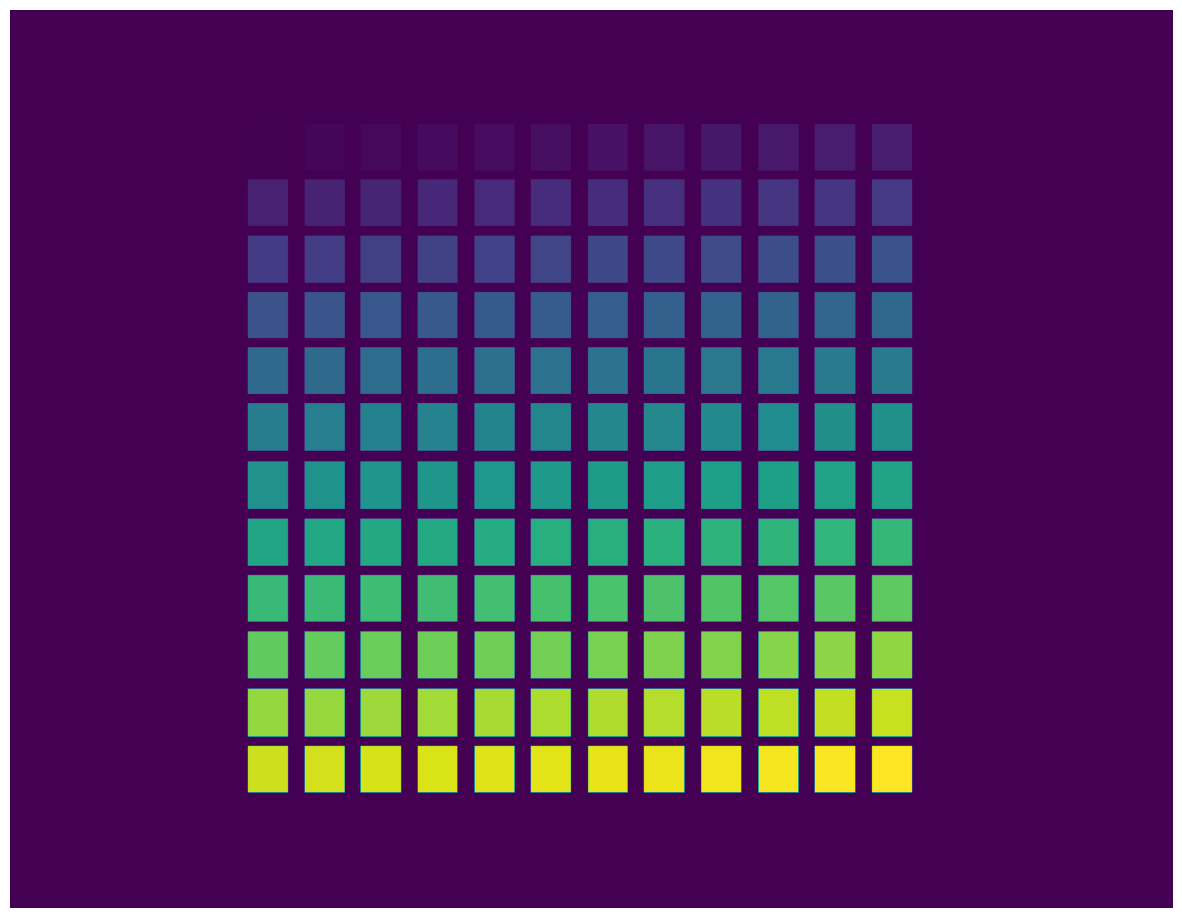

In [7]:
# Create a numpy array of the same size as the grayscale image, but where the value of each entry is 
# 12*rowID + colID, where rowID and colID are the row and column IDs of the corresponding entry in the
# grayscale image.
mask = np.zeros_like(gray_img).astype(int)
for i in range(1, len(average_Column)):
    for j in range(1, len(average_Row)):
        if rowIDs[i]>0 and colIDs[j]>0:
            mask[i][j] = 12*(rowIDs[i]-1) + colIDs[j] 

# Display the mask.
plt.figure(figsize=(15, 15))
plt.imshow(mask)
plt.axis('off')
plt.show()

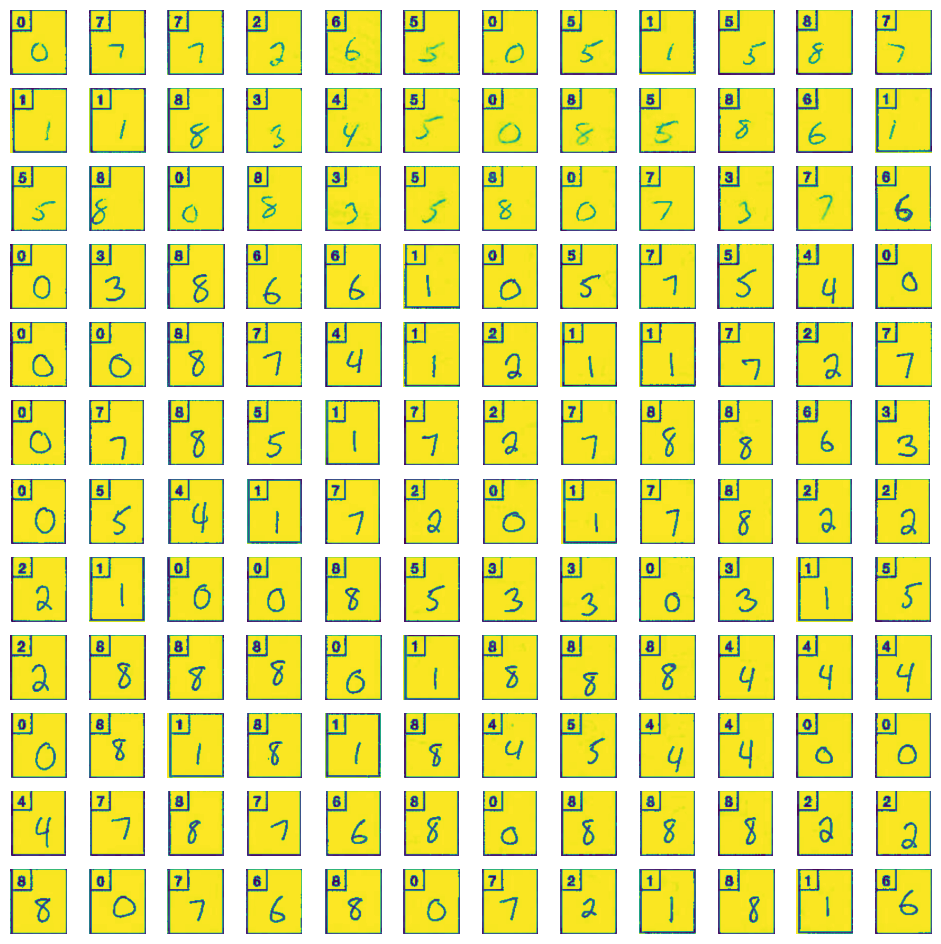

In [8]:
# Loop through the mask and create a subimage from the grayscale image for each unique value in the mask.
# Then, display the subimages in a 12x12 grid.
subImages = []

for i in range(1,np.max(mask)+1):
    maskedImage = gray_img*(mask==i)
    # crop the image to remove the white space
    row = np.any(maskedImage, axis=1)
    col = np.any(maskedImage, axis=0)
    rmin, rmax = np.where(row)[0][[0, -1]]
    cmin, cmax = np.where(col)[0][[0, -1]]
    subImages.append(maskedImage[rmin:rmax, cmin:cmax])

fig, axs = plt.subplots(12, 12, figsize=(12, 12))
for i in range(12):
    for j in range(12):
        axs[i, j].imshow(subImages[i * 12 + j])
        axs[i, j].axis('off')
plt.show()

In [9]:
# Create a function to redo the above steps for a given page of the PDF.
def process_page(img):
    # Convert the image to a grayscale image and display it.
    gray_img = np.mean(img, axis=2)

    # Average the grayscale image over the rows and display the resulting 1D NumPy array.
    average_Row = np.mean(gray_img, axis=0)
    average_Column = np.mean(gray_img, axis=1)

    colIDs = np.zeros_like(average_Row)
    rowNumber = 0
    for i in range(1, len(average_Row)-1):
        if average_Row[i] > 250:
            colIDs[i] = 0
        elif average_Row[i-1] > 250:
            rowNumber += 1
            colIDs[i] = 0
        elif average_Row[i+1] > 250:
            colIDs[i] = 0
        else:
            colIDs[i] = rowNumber

    rowIDs = np.zeros_like(average_Column)
    colNumber = 0
    for i in range(1, len(average_Column)-1):
        if average_Column[i] > 250:
            rowIDs[i] = 0
        elif average_Column[i-1] > 250:
            colNumber += 1
            rowIDs[i] = 0
        elif average_Column[i+1] > 250:
            rowIDs[i] = 0    
        else:
            rowIDs[i] = colNumber

    mask = np.zeros_like(gray_img).astype(int)
    for i in range(1, len(average_Column)):
        for j in range(1, len(average_Row)):
            if rowIDs[i]>0 and colIDs[j]>0:
                mask[i][j] = 12*(rowIDs[i]-1) + colIDs[j]    

    subImages = []
    for i in range(1,np.max(mask)+1):
        maskedImage = gray_img*(mask==i)
        row = np.any(maskedImage, axis=1)
        col = np.any(maskedImage, axis=0)
        rmin, rmax = np.where(row)[0][[0, -1]]
        cmin, cmax = np.where(col)[0][[0, -1]]
        subImages.append(maskedImage[rmin:rmax, cmin:cmax])

    return subImages     

In [10]:
# Process the first page of the PDF and display the subimages in a 12x12 grid.
subImages = []
for page in imgSet:
    subImages.extend(process_page(page))
    

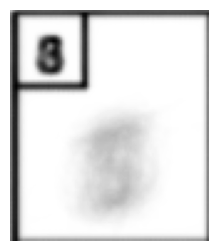

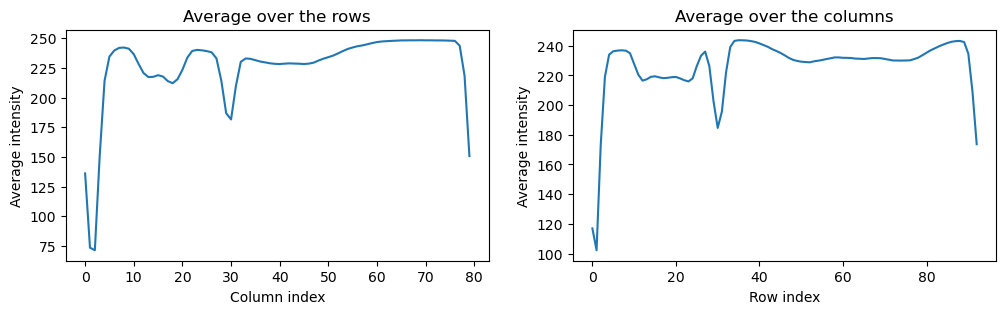

In [11]:
# Loop over the subimages and find the minimum width and height of the subimages.
minWidth = subImages[0].shape[1]
minHeight = subImages[0].shape[0]
for i in range(len(subImages)):
    if subImages[i].shape[1] < minWidth:
        minWidth = subImages[i].shape[1]
    if subImages[i].shape[0] < minHeight:
        minHeight = subImages[i].shape[0]
        
# Create an average image by averaging the subimages. Truncate each subimage to the minimum width and height
# before averaging.
averageImage = np.zeros((minHeight, minWidth))
for i in range(len(subImages)):
    averageImage += subImages[i][:minHeight, :minWidth]
averageImage /= len(subImages)

# Display the average image.
plt.figure(figsize=(3, 3))
plt.imshow(averageImage, cmap='gray')
plt.axis('off')
plt.show()

# Compute the row and column averages of the average image and display the resulting 1D NumPy arrays.
average_Row = np.mean(averageImage, axis=0)
average_Column = np.mean(averageImage, axis=1)

# Create two subplots, one for the average over the rows and one for the average over the columns.
fig, axs = plt.subplots(1, 2, figsize=(12,3))
axs[0].plot(average_Row)
axs[0].set_title('Average over the rows')
axs[0].set_xlabel('Column index')
axs[0].set_ylabel('Average intensity')
axs[1].plot(average_Column)
axs[1].set_title('Average over the columns')
axs[1].set_xlabel('Row index')
axs[1].set_ylabel('Average intensity')
plt.show()


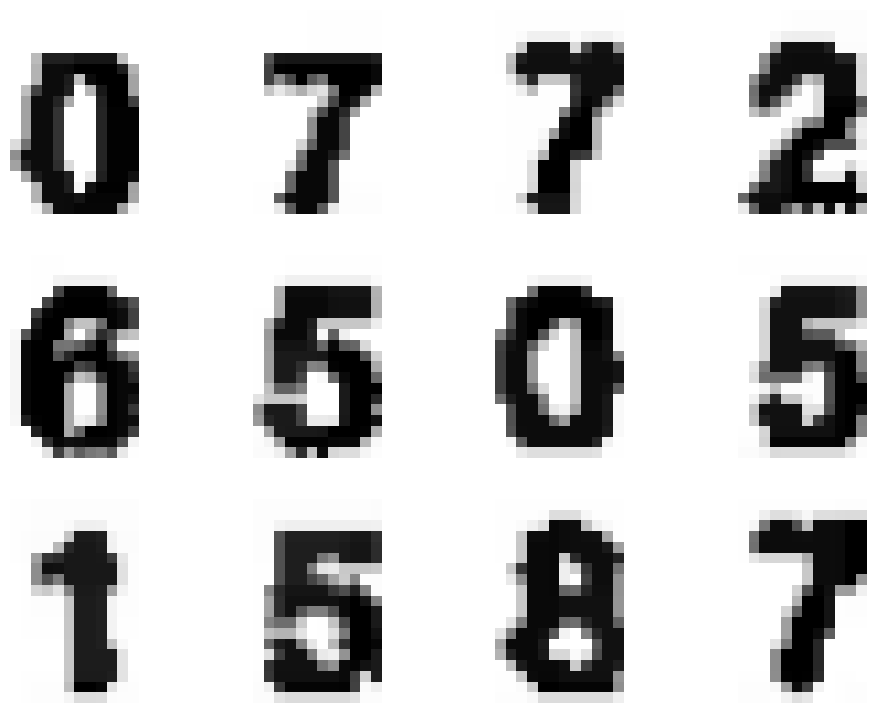

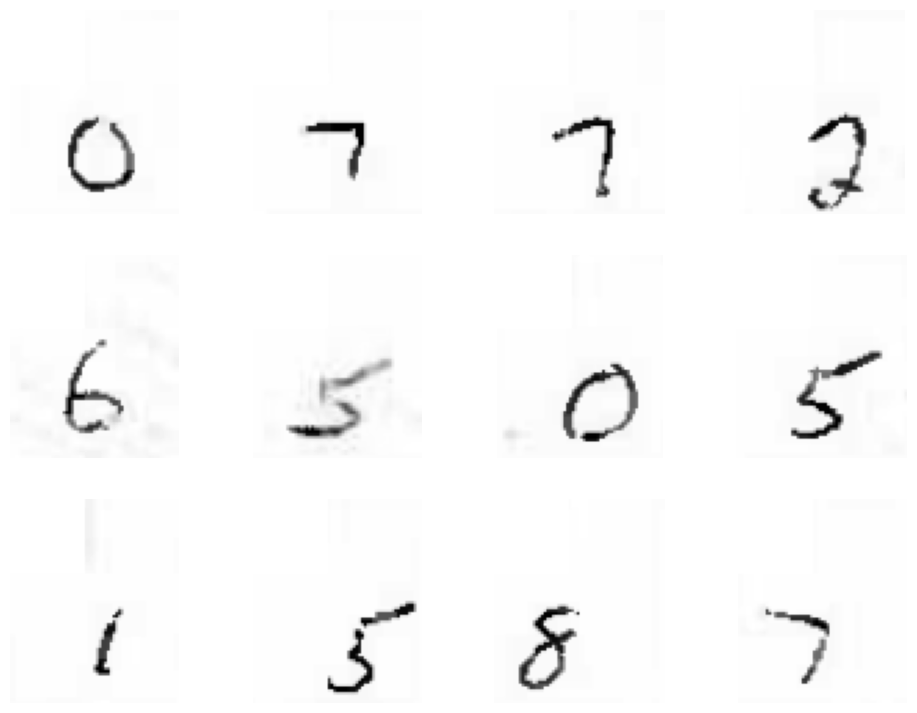

In [12]:
# For each subimage in the typeLabeled data, split into two new images.  
# The first will be the top left 11x11 box, and the second will be the original image with the top left 11x11 box removed.
labelList = []
typedList = []
drawingList = []

for i in range(len(subImages)):
    for j in range(-1, 2):
        for k in range(-1, 2):       
            labImage = subImages[i][8+j:27+j, 10+k:22+k]

            typedList.append(labImage)
    
            img = subImages[i].copy()

            img[0:36, 0:36] = 255
            # crop the image to remove the first two rows and columns
            img = img[10+j:-10+j, 10+k:-10+k]

            drawingList.append(img)

            if i<len(labels):
                labelList.append(labels[i])

# Randomly shuffle the label and drawing lists using the same random seed.
# inds = list(range(len(labelList)))
# random.shuffle(inds)
# labelList = [labelList[i] for i in inds]
# typedList = [typedList[i] for i in inds]
# drawingList = [drawingList[i] for i in inds]

# Display the first 12 images in the label list in a 3x4 grid.
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
for i in range(3):
    for j in range(4):
        axs[i, j].imshow(typedList[(i * 4 + j)*9], cmap='gray')
        axs[i, j].axis('off')
plt.show()

# Display the first 12 images in the drawing list in a 3x4 grid.
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
for i in range(3):
    for j in range(4):
        axs[i, j].imshow(drawingList[(i * 4 + j)*9], cmap='gray')
        axs[i, j].axis('off')
plt.show()

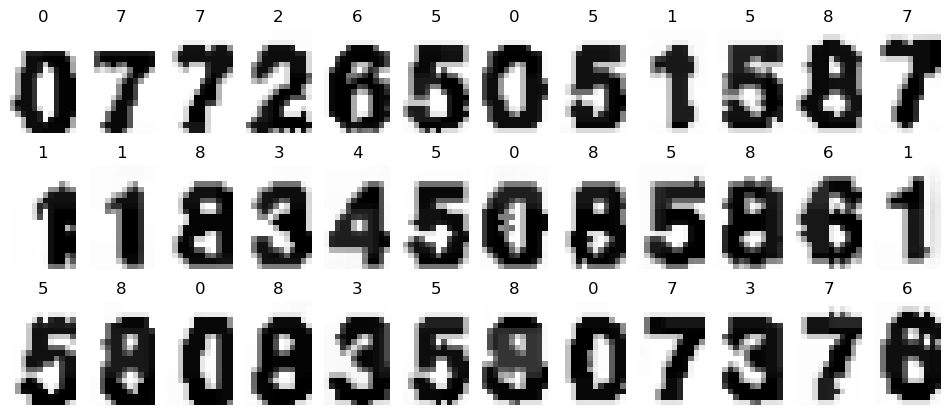

In [13]:
# Loop through the label list and create a matrix where each row is the flattened version of the corresponding image in the label list.
typedMatrix = np.zeros((len(typedList),len(typedList[0].flatten())))
for i in range(len(typedList)):
    typedMatrix[i] = typedList[i].flatten()

# Display the first 36 images in the label list in a 3x12 grid, with the corresponding label as the title.
fig, axs = plt.subplots(3, 12, figsize=(12, 5))
for i in range(3):
    for j in range(12):
        axs[i, j].imshow(typedList[(i * 12 + j)*9], cmap='gray')
        axs[i, j].set_title(labelList[(i * 12 + j)*9])
        axs[i, j].axis('off')


/Users/munsky/anaconda3/envs/biom421mac_env/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


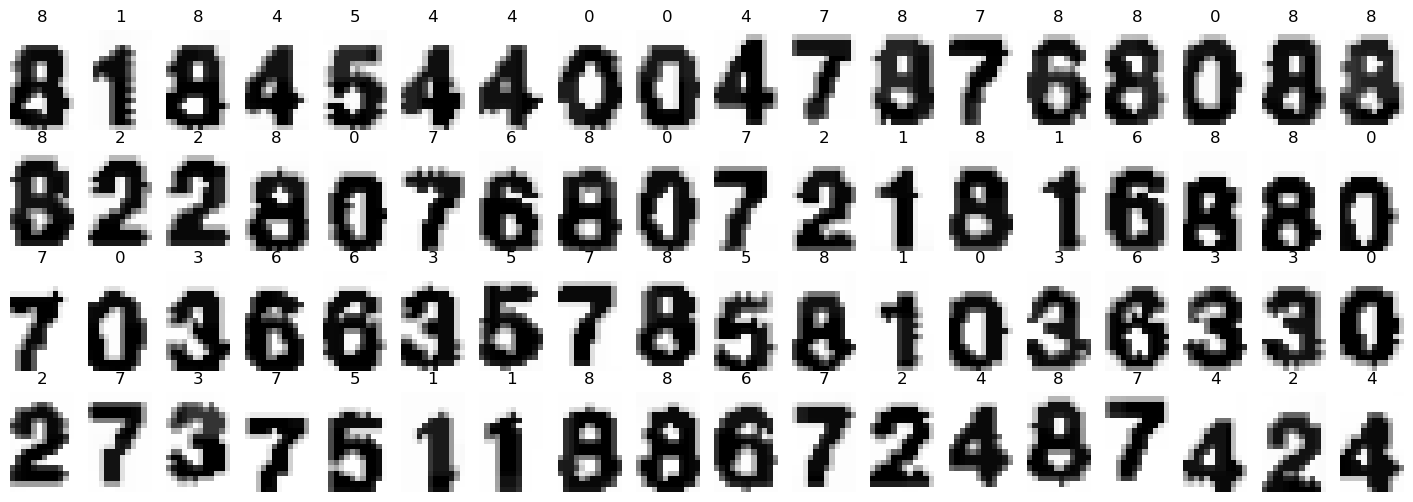

Accuracy: 0.9695945945945946


In [14]:
# Associate the labelMatrix with the labels list, and build a classifier using the first 120 images in the label list.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
nTrain = 1000
classifier.fit(typedMatrix[:nTrain], labelList[:nTrain])

# Use the classifier to predict the labels of the last 24 images in the label list.
predictedLabels = classifier.predict(typedMatrix)

# Display the last 24 images in the drawing list in a 4x12 grid, with the predicted labels as titles.
fig, axs = plt.subplots(4, 18, figsize=(18, 6))
for i in range(4):
    for j in range(18):
        axs[i, j].imshow(typedList[(i * 18 + j)*9 + nTrain], cmap='gray')
        axs[i, j].set_title(predictedLabels[(i * 18 + j)*9 + nTrain])
        axs[i, j].axis('off')
plt.show()

print('Accuracy:', np.mean(predictedLabels[nTrain:len(labelList)] == labelList[nTrain:]))


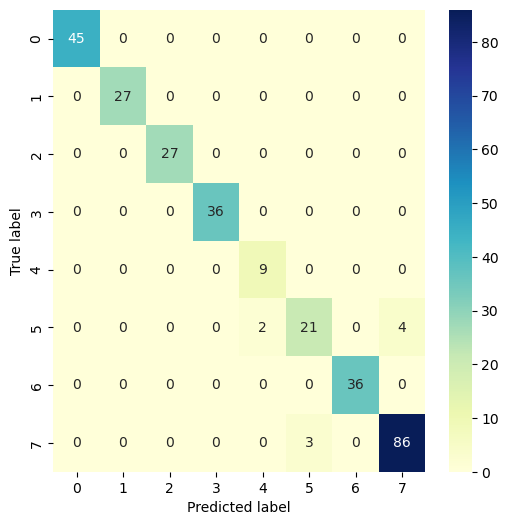

In [16]:
# Create a confusion matrix for the classifier on the predicted labels.
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(labelList[nTrain:9*144], predictedLabels[nTrain:9*144])

# Display the confusion matrix as a heatmap.
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(confusionMatrix, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
